# P4W3: Neurale Netwerken

In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
import math
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, Adamax, RMSprop
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

## Vraag 0: Integratie en activatie functie

In [8]:
# input = [1, 1], gewichten = [0.3, -0.1], bias = -0.7
input = np.array([1, 1])
gewichten = np.array([0.3, -0.1])
bias = -0.7

#integratie = 1 * 0.3 + 1 * (-0.1) - 0.7
integratie = np.sum(input * gewichten) + bias

# Welke input node heeft hier de grootste invloed?
# eerste

# activatie = sigmoid (logistische functie)
activatie = 1 / (1 + math.exp(-integratie))

print(integratie, activatie)


-0.5 0.3775406687981454


## Vraag 1: Simpsons

In [9]:
#a -> Stap 1: Laad dataset op en inspecteer de gegevens
simpsons = pd.read_csv('../../oefeningen/DataSets/The Simpsons original.csv',delimiter=',')
simpsons.info()
#simpsons

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         9 non-null      object
 1   hair length  9 non-null      int64 
 2   weight       9 non-null      int64 
 3   age          9 non-null      int64 
 4   gender       9 non-null      object
dtypes: int64(3), object(2)
memory usage: 492.0+ bytes


b. binary classification

c. name -> Nominal variabel, gender -> output

In [10]:
#d -> Stap 2: Inputs en outputs
x_simpsons = simpsons[['hair length','weight', 'age']]
y_simpsons = simpsons['gender']
y_simpsons = y_simpsons.replace(to_replace=['M','F'], value=[0,1])
y_simpsons = to_categorical(y_simpsons) # 1-hot encoding [M, F]
y_simpsons # 1ste kolom is M, 2de F

C:\Users\robbe\AppData\Local\Temp\ipykernel_10284\4181796902.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_simpsons = y_simpsons.replace(to_replace=['M','F'], value=[0,1])


array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [11]:
# Stap 3: Normaliseer de data
scaler = MinMaxScaler()
x_simpsons_norm = scaler.fit_transform(x_simpsons)
x_simpsons_norm

array([[0.        , 1.        , 0.50724638],
       [1.        , 0.56521739, 0.47826087],
       [0.2       , 0.30434783, 0.13043478],
       [0.6       , 0.25217391, 0.10144928],
       [0.4       , 0.        , 0.        ],
       [0.1       , 0.65217391, 1.        ],
       [0.8       , 0.60869565, 0.57971014],
       [1.        , 0.69565217, 0.53623188],
       [0.6       , 0.7826087 , 0.63768116]])

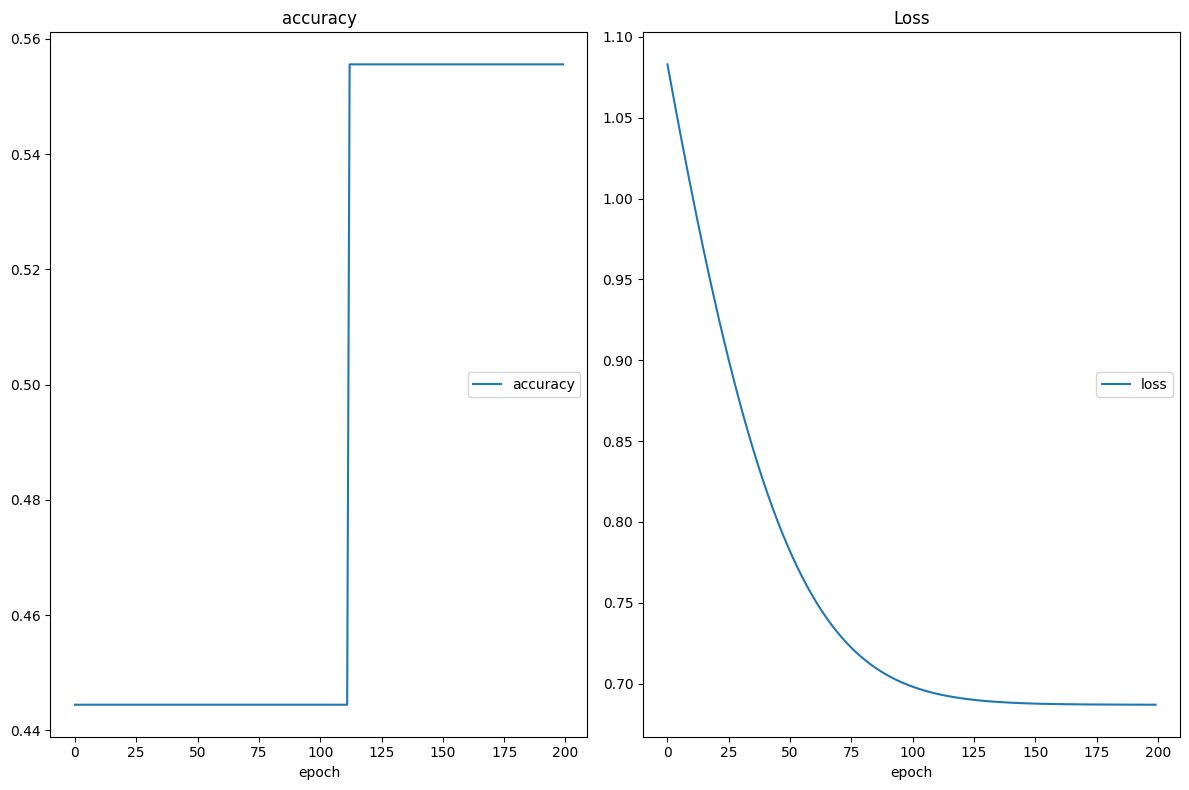

accuracy
	accuracy         	 (min:    0.444, max:    0.556, cur:    0.556)
Loss
	loss             	 (min:    0.687, max:    1.083, cur:    0.687)


In [12]:
#e -> Construeer het ANN-model + Stap 6: Train het ANN-model
inputs_simpsons = Input(shape=(3,))
x_simp = Dense(6, activation='sigmoid')(inputs_simpsons)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(24, activation='sigmoid')(x_simp)
x_simp = Dense(12, activation='sigmoid')(x_simp)
x_simp = Dense(6, activation='sigmoid')(x_simp)
outputs_simpsons = Dense(2, activation='softmax')(x_simp) 
model_simpsons = Model(inputs_simpsons, outputs_simpsons, name='Simpsons')
model_simpsons.summary()
plot_model(model_simpsons, to_file='model_simpsons_plot.png', show_shapes=True, show_layer_names=True)

model_simpsons.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=keras.losses.categorical_crossentropy,
    #loss=keras.losses.binary_crossentropy,
    metrics=['accuracy']
)

history_simpsons = model_simpsons.fit(
    x_simpsons_norm, # training data
    y_simpsons, # training targets
    epochs=200,
    callbacks=[PlotLossesKeras()],
    verbose=False
)



In [13]:
#f
print(model_simpsons.predict(x_simpsons_norm))
print(model_simpsons.evaluate(x_simpsons_norm, y_simpsons))

# Comic guy
df_comic = pd.DataFrame({'hair length': [8.], 'weight': [500.], 'age': [38.]})
df_comic_norm = scaler.transform(df_comic)  # zelfde scaler als tijdens training gebruiken
model_simpsons.predict(df_comic_norm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.55272865 0.44727138]
 [0.5528057  0.44719428]
 [0.5526156  0.4473844 ]
 [0.55265194 0.4473481 ]
 [0.55258125 0.44741878]
 [0.55282694 0.44717306]
 [0.5528133  0.4471867 ]
 [0.5528259  0.44717407]
 [0.55281544 0.44718453]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5556 - loss: 0.6869
[0.6869282126426697, 0.5555555820465088]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.55286354, 0.44713655]], dtype=float32)

## Vraag 2: Forecast

In [14]:
#a
forecast = pd.read_csv('../../oefeningen/DataSets/forcastdemo.csv',delimiter=';')
forecast.info()
#forecast.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Year     20 non-null     int64
 1   Quarter  20 non-null     int64
 2   Revenu   20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


b. regression

c. The first 2 columns can be used as input, the third column contains the output


In [15]:
# Inputs en outputs
x_forecast = forecast[['Year','Quarter']]
y_forecast = forecast['Revenu']

In [16]:
# Normalisation
scaler = MinMaxScaler()
x_forecast_norm = scaler.fit_transform(x_forecast)

In [17]:
#e -> Construeer het ANN-model
inputs_forecast = Input(shape=(2,))
x_for = Dense(64, activation='relu')(inputs_forecast)
x_for = Dense(64, activation='relu')(x_for)
x_for = Dense(64, activation='relu')(x_for)
outputs_forecast = Dense(1, activation='linear')(x_for)

model_forecast = Model(inputs_forecast, outputs_forecast, name='Forecast')
model_forecast.summary()
plot_model(model_forecast, to_file='model_forecast_plot.png', show_shapes=True, show_layer_names=True)

model_forecast.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=keras.losses.MeanAbsoluteError(),
    metrics=keras.metrics.MeanAbsolutePercentageError()
)

Model: "Forecast"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,577 (33.50 KB)

 Trainable params: 8,577 (33.50 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: Expected `metrics` argument to be a list, tuple, or dict. Received instead: metrics=<MeanAbsolutePercentageError name=mean_absolute_percentage_error> of type <class 'keras.src.metrics.regression_metrics.MeanAbsolutePercentageError'>

In [ ]:
# train het model
history_forecast = model_forecast.fit(
    x_forecast_norm, # training data
    y_forecast, # training targets
    epochs=100,
    callbacks=[PlotLossesKeras()],
    verbose=False
)

In [ ]:
#f
model_forecast.evaluate(x_forecast_norm, y_forecast)
predicted=model_forecast.predict(x_forecast_norm)
print(predicted.shape)
plt.figure()
plt.plot(range(0,len(forecast)), y_forecast, 'o-', label = 'real')
plt.plot(range(0,len(forecast)), predicted[:,0], 'o-', label = 'predicted')
plt.xlabel('quarter')
plt.ylabel('revenue (EUR)')
plt.title('ANN')
plt.legend()
plt.show()

## Vraag 3

In [18]:
iris = pd.read_csv('../../oefeningen/DataSets/iris.csv',delimiter=',', decimal='.')
iris.info()
#iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


b. multi-class classification

c. The first 4 columns can be used as input, the last column contains the output


In [19]:
#d -> Stap 2: Inputs en outputs
x_iris = iris[['sepal length','sepal width', 'petal length', 'petal width']]
y_iris = iris['target']
print(y_iris.unique())
y_iris=y_iris.replace(to_replace={'Iris-setosa','Iris-versicolor', 'Iris-virginica'}, value={0,1,2})
y_iris_cat=to_categorical(y_iris)
print(y_iris_cat[:5])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


C:\Users\robbe\AppData\Local\Temp\ipykernel_10284\4233021349.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_iris=y_iris.replace(to_replace={'Iris-setosa','Iris-versicolor', 'Iris-virginica'}, value={0,1,2})


In [20]:
# Stap 3: Normaliseer de data
scaler = StandardScaler()
x_iris_norm = scaler.fit_transform(x_iris)

In [21]:
#e
x_train_iris,x_test_iris,y_train_iris,y_test_iris=train_test_split(x_iris_norm,y_iris_cat,test_size=0.2) #0.2 = 20%

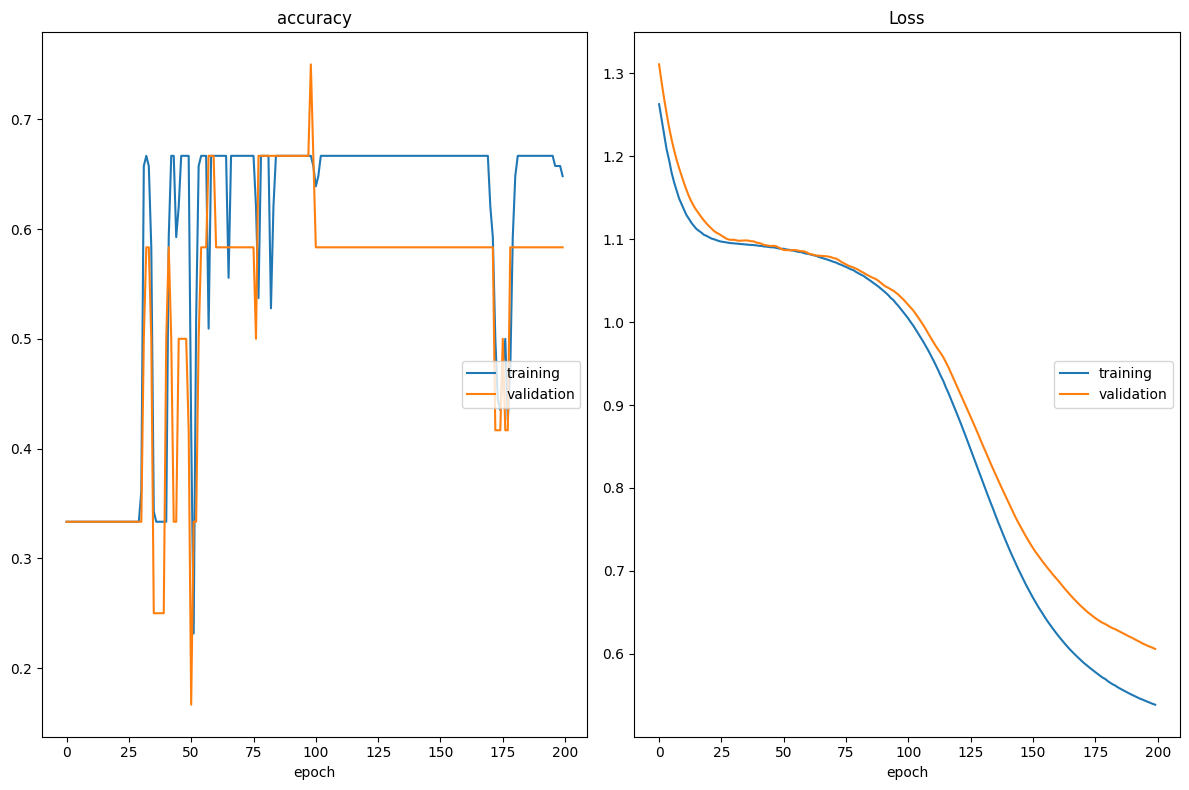

accuracy
	training         	 (min:    0.231, max:    0.667, cur:    0.648)
	validation       	 (min:    0.167, max:    0.750, cur:    0.583)
Loss
	training         	 (min:    0.539, max:    1.262, cur:    0.539)
	validation       	 (min:    0.606, max:    1.310, cur:    0.606)


In [34]:
#f -> Stap 5 Construeer het ANN-model + Stap 6: Train het ANN-model
inputs_iris = Input(shape=(4,))
#x_ir = Dense(6, activation='relu')(inputs_iris)
#x_ir = Dense(4, activation='relu')(x_ir)
x_ir = Dense(4, activation='sigmoid')(inputs_iris)
x_ir = Dense(8, activation='sigmoid')(x_ir)
x_ir = Dense(16, activation='sigmoid')(x_ir)
x_ir = Dense(8, activation='sigmoid')(x_ir)
outputs_iris = Dense(3, activation='softmax')(x_ir)

model_iris = Model(inputs_iris, outputs_iris, name='Iris')
print(model_iris.summary())
plot_model(model_iris, to_file='model_iris_plot.png', show_shapes=True, show_layer_names=True)

model_iris.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

history_iris = model_iris.fit(
    x_train_iris, # training data
    y_train_iris, # training targets
    epochs=200,
    callbacks=[PlotLossesKeras()],
    validation_split=0.1,
    verbose=False
)


In [35]:
#g
model_iris.evaluate(x_test_iris, y_test_iris)
y_predict = model_iris.predict(x_test_iris)
print(y_predict.shape)
print(np.argmax(y_predict,axis=1))
print(np.argmax(y_test_iris,axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7000 - loss: 0.5154
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
(30, 3)
[1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0]
[1 2 0 1 0 2 0 0 2 1 1 2 0 0 1 2 2 0 1 0 1 0 1 2 2 1 0 1 1 2]
